## Digit Recognition Project

In [9]:
import numpy as np
import pandas as pd

from data_utils import plot_images_with_labels, get_augmented_data
from grid_search import get_best_pipeline

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

# import matplotlib.pyplot as plt

### A. Data Exploration and Preprocessing
1. Load and inspect the dataset: Discuss the meaning of the data and make sure that they are properly loaded. For example, are all data values sensible? Please include a figure or table to illustrate that the data is properly loaded.
2. Perform the necessary steps to put the data in the right format for the machine learning algorithms. Explain the steps you take and why you take them. You are expected to  use all features and images – there is no need for outlier pruning or other fancy preprocessing techniques.


#### Load and Inspect the Dataset

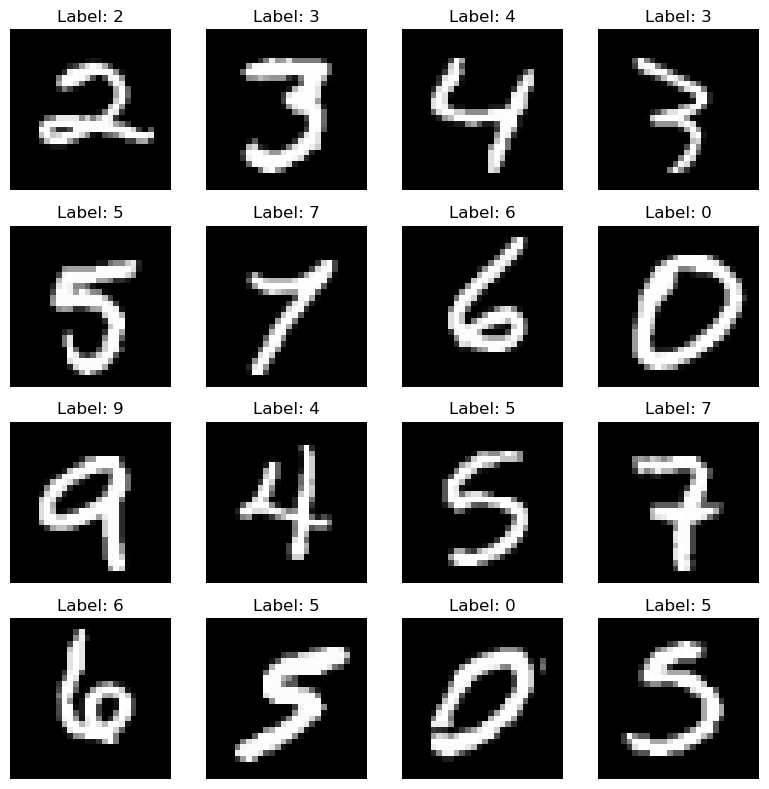

In [2]:
# Load the dataset and plot some samples

labeled_images = np.load("labeled_images.npy")
labeled_digits = np.load("labeled_digits.npy")

autograder_images = np.load("autograder_images.npy")

dataset = (labeled_images, labeled_digits)

plot_images_with_labels(dataset, num_images=16)

In [3]:
# Inspect the dataset

# Inspect shapes of the datasets
dataset_shape = labeled_images.shape
labels_shape = labeled_digits.shape

print(f"Original dataset shapes: {labeled_images.shape}, {labeled_digits.shape}")

# Compute basic statistics for labeled_images
images_min = np.min(labeled_images)
images_max = np.max(labeled_images)
images_mean = np.mean(labeled_images)
images_std = np.std(labeled_images)

labels_min = np.min(labeled_digits)
labels_max = np.max(labeled_digits)
labels_mean = np.mean(labeled_digits)
labels_std = np.std(labeled_digits)
labels_median = np.median(labeled_digits)

# Check the unique labels in labeled_digits
unique_labels = np.unique(labeled_digits)

# Prepare a summary table
summary_table = pd.DataFrame({
    "Attribute": ["Shape", "Min", "Max", "Mean", "Standard Deviation", "Median", "Unique Labels"],
    "Images": [str(dataset_shape), images_min, images_max, images_mean, images_std, None, None],
    "Labels": [str(labels_shape), labels_min, labels_max, labels_mean, labels_std, labels_median, unique_labels.tolist()]
})

# Save the label data summary as a markdown file
markdown_content = summary_table.to_markdown(index=False)

# Save to a .md file
file_path = "report/data_summary.md"
with open(file_path, "w") as f:
    f.write(markdown_content)

summary_table

Original dataset shapes: (3750, 28, 28), (3750,)


,Attribute,Images,Labels
0,Shape,"(3750, 28, 28)","(3750,)"
1,Min,0,0
2,Max,255,9
3,Mean,33.608054,4.462667
4,Standard Deviation,78.895908,2.883159
5,Median,None,4.0
6,Unique Labels,None,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]"


In [4]:
# Compute the distribution of labels
label_counts = np.bincount(labeled_digits)

# Create a DataFrame to summarize the distribution
label_distribution = pd.DataFrame({
    "Label": range(len(label_counts)),
    "Count": label_counts,
    "Percentage": (label_counts / len(labeled_digits)) * 100
})

# Save the label distribution as a markdown file
markdown_content = label_distribution.to_markdown(index=False)

# Save to a .md file
file_path = "report/label_distribution.md"
with open(file_path, "w") as f:
    f.write(markdown_content)

label_distribution

,Label,Count,Percentage
0,0,395,10.533333
1,1,376,10.026667
2,2,367,9.786667
3,3,378,10.080000
4,4,388,10.346667
5,5,366,9.760000
6,6,371,9.893333
7,7,366,9.760000
8,8,366,9.760000
9,9,377,10.053333


#### Data Preprocessing and Augmentation

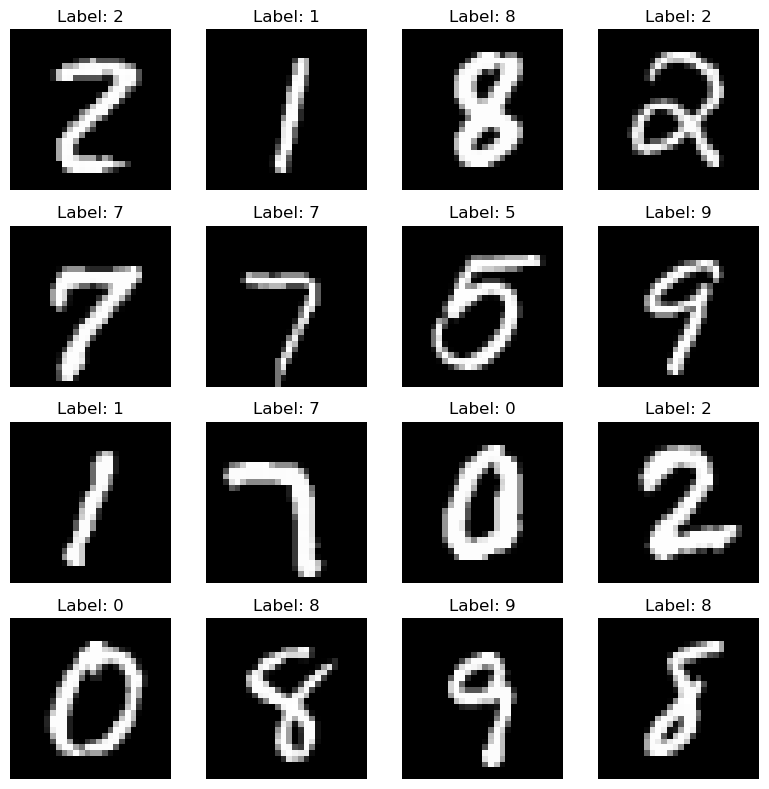

In [5]:
# Augment the data and plot some samples
augmented_dataset = get_augmented_data(dataset)
plot_images_with_labels(dataset, num_images=16)

In [6]:
augmented_images, augmented_labels = augmented_dataset

# Inspect the dataset

# Inspect shapes of the datasets
dataset_shape = augmented_images.shape
labels_shape = augmented_labels.shape

print(f"Augmented dataset shapes: {augmented_images.shape}, {augmented_labels.shape}")

# Compute basic statistics for augmented_images
images_min = np.min(augmented_images)
images_max = np.max(augmented_images)
images_mean = np.mean(augmented_images)
images_std = np.std(augmented_images)

labels_min = np.min(augmented_labels)
labels_max = np.max(augmented_labels)
labels_mean = np.mean(augmented_labels)
labels_std = np.std(augmented_labels)
labels_median = np.median(augmented_labels)

# Check the unique labels in labels
unique_labels = np.unique(augmented_labels)

# Prepare a summary table
summary_table = pd.DataFrame({
    "Attribute": ["Shape", "Min", "Max", "Mean", "Standard Deviation", "Median", "Unique Labels"],
    "Images": [str(dataset_shape), images_min, images_max, images_mean, images_std, None, None],
    "Labels": [str(labels_shape), labels_min, labels_max, labels_mean, labels_std, labels_median, unique_labels.tolist()]
})

# Save the label data summary as a markdown file
markdown_content = summary_table.to_markdown(index=False)

# Save to a .md file
file_path = "report/augmented_data_summary.md"
with open(file_path, "w") as f:
    f.write(markdown_content)

summary_table

Augmented dataset shapes: (22500, 28, 28), (22500,)


,Attribute,Images,Labels
0,Shape,"(22500, 28, 28)","(22500,)"
1,Min,0.0,0
2,Max,255.0,9
3,Mean,5.736053,4.462667
4,Standard Deviation,34.537638,2.883159
5,Median,None,4.0
6,Unique Labels,None,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]"


In [7]:
# Compute the distribution of labels
label_counts = np.bincount(augmented_labels)

# Create a DataFrame to summarize the distribution
label_distribution = pd.DataFrame({
    "Label": range(len(label_counts)),
    "Count": label_counts,
    "Percentage": (label_counts / len(augmented_labels)) * 100
})

# Save the label distribution as a markdown file
markdown_content = label_distribution.to_markdown(index=False)

# Save to a .md file
file_path = "report/augmented_label_distribution.md"
with open(file_path, "w") as f:
    f.write(markdown_content)

label_distribution

,Label,Count,Percentage
0,0,2370,10.533333
1,1,2256,10.026667
2,2,2202,9.786667
3,3,2268,10.080000
4,4,2328,10.346667
5,5,2196,9.760000
6,6,2226,9.893333
7,7,2196,9.760000
8,8,2196,9.760000
9,9,2262,10.053333


### B. Regression with Default Hyperparameters
1. What is the simplest baseline model we should aim to beat? Or in other words, if you would have to make a guess for the label without knowing anything about the image, what would you guess? What is the accuracy of such a guess?
2. Train the 4 models with default hyperparameters and fairly estimate their performance. Explain why the performance estimate is fair and how you estimated the performance.
3. Submit your work to the autograder to check your work so far.

### C. Tuning with GridSearch
1. For all 4 models, use GridSearch (or any other strategy) to identify the best hyperparameters. Use a systematic way to tune hyperparameters that is reproducible. 2. Explain your choice of hyperparameter search ranges and settings. Include sufficient details in the report so that another student can reproduce your experiment.
3. Include a training curve (accuracy versus epochs) to illustrate how SGD converges.
Explain why the performance estimate is fair for the tuned models and how you estimated the performance.
4. Compare the performance of all models before and after hyperparameter tuning


#### Dummy Classifier

```python
class sklearn.dummy.DummyClassifier(*, strategy='prior', random_state=None, constant=None)
```

In [10]:
dummy = DummyClassifier(strategy="most_frequent")

dummy_results = get_best_pipeline(dataset, dummy, {})

# Output test set accuracy
print(f"Test set accuracy: {dummy_results[2]:.4f}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Best parameters found: {}
Best cross-validation accuracy: 0.10533333333333332
Test set accuracy: 0.1053


#### Stochastic Gradient Descent Classifier with Logistic Loss Function

```python
class sklearn.linear_model.SGDClassifier(loss='hinge', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)
```

##### Default Hyperparamters

In [11]:
default_SGD = SGDClassifier(loss="log_loss")

default_SGD_results = get_best_pipeline(dataset, default_SGD, {})

# Output test set accuracy
print(f"Test set accuracy: {default_SGD_results[2]:.4f}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Best parameters found: {}
Best cross-validation accuracy: 0.8493333333333334
Test set accuracy: 0.8387


##### GridSearch Cross-Validation

In [ ]:
model = SGDClassifier(
        loss="log_loss"
    )


param_grid = {
    "model__penalty": ["l2","l1","elasticnet",None],
    "model__alpha": [0.01, 1, 10, 100],  # Constant of regularization term
}


Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best parameters found: {'model__alpha': 0.01, 'model__penalty': 'l2'}
Best cross-validation accuracy: 0.8773333333333333
Test set accuracy: 0.8547


### Prepare autograder submission

In the autograder you will need to provide two things: 1) estimate of the accuracy of your model on unseen data, 2) the predictions on the autograder images. For the autograder images we only provide the images and not the class labels. Thus, you cannot compute the accuracy on this data yourself - you need to estimate that with labeled data that is provided (labeled_images, labeled_digits). We will calculate the accuracy for you on the autograder data and you will receive an automatic grade based on this. 

In [5]:

estimate = np.array([0.7]) # TODO Replace this with your estimate of the accuracy on new data
prediction = np.array([-1] * len(autograder_images)) # TODO Replace this with your predictions of your best model
# For example using something like:
# prediction = my_super_duper_model.predict(autograder_images) 

result = np.append(estimate, prediction)

# The code below will write your estimate and prediction to a file named autograder.txt
# You will need to upload this file to the Vocareum autograder
pd.DataFrame(result).to_csv("autograder.txt", index=False, header=False)